In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\nhduc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
df = pd.read_csv(r"../../data/all_anonymized_2015_11_2017_03.csv")
df.head()

C:\Users\nhduc\AppData\Local\Temp\ipykernel_20960\2194631899.py:1: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"../../data/all_anonymized_2015_11_2017_03.csv")


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


### EDA

#### Maker/Model

In [17]:
maker_model_count = df.groupby(['maker', 'model'], as_index=False).size().sort_values('size', ascending=False)
maker_model_count

,maker,model,size
1009,skoda,octavia,129554
1000,skoda,fabia,91399
1118,volkswagen,golf,91228
383,ford,focus,61135
842,opel,astra,58374
...,...,...,...
999,skoda,colt,1
248,chrysler,intrepid,1
1006,skoda,kangoo,1
1007,skoda,laguna,1


In [18]:
maker_model_count[-400:]

,maker,model,size
735,mercedes-benz,s350-cdi,32
790,nissan,200-sx,32
635,mercedes-benz,b200-cdi,31
587,lotus,esprit,31
907,porsche,987-boxster,31
...,...,...,...
999,skoda,colt,1
248,chrysler,intrepid,1
1006,skoda,kangoo,1
1007,skoda,laguna,1


In [19]:
counts = df['maker'].value_counts()
top_ten = (counts / counts.sum())[:10]

top_ten = round(top_ten * 100, 2)[::-1]

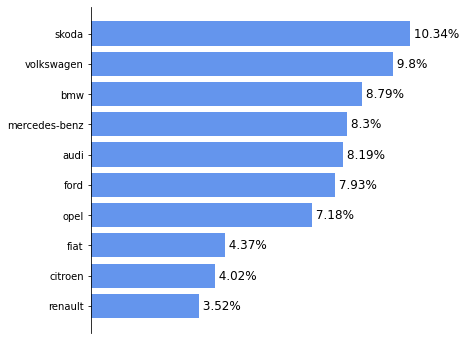

In [125]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot horizontal bars
bars = ax.barh(top_ten.index, top_ten.values, color='cornflowerblue')

# Display values on top of each bar
for bar, value in zip(bars, top_ten.values):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, " " + str(value) + "%",
            va='center', ha='left', fontsize=12)

# Remove x-axis ticks and labels
ax.set_xticks([])

# Remove spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()

#### Mileage

In [21]:
temp_df = df.loc[df['mileage'] < 400000]
mileage = temp_df['mileage']

mileage_0 = mileage[mileage != 0]

(array([1105673.,  416849.,  453018.,  432376.,  361908.,  207235.,
         109339.,   50096.,   20150.,    9234.]),
 array([     0. ,  39999.9,  79999.8, 119999.7, 159999.6, 199999.5,
        239999.4, 279999.3, 319999.2, 359999.1, 399999. ]),
 <BarContainer object of 10 artists>)

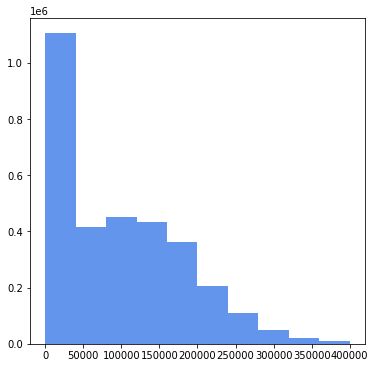

In [22]:
plt.figure(figsize=(6, 6))
plt.hist(mileage, color='cornflowerblue')

In [23]:
temp_df.groupby('maker').mileage.mean().sort_values(ascending=False) 

maker
chrysler         154793.448771
alfa-romeo       145730.652895
land-rover       126099.970986
volvo            116571.168162
skoda            112428.342870
bmw              110899.426410
volkswagen       107997.032905
mercedes-benz    104813.170415
subaru           102776.032940
audi             102678.693919
ford             101206.211999
peugeot          100380.542658
lexus             98554.193897
honda             98296.304785
mazda             97541.000622
renault           97251.805647
mitsubishi        96413.234000
opel              95898.337272
rover             94393.973354
hummer            92409.824138
citroen           92195.207925
toyota            90930.311032
chevrolet         87125.138182
seat              84229.245828
dacia             80525.514914
lancia            79819.252626
dodge             78378.825700
jaguar            78192.030205
fiat              76891.017459
suzuki            73910.706766
nissan            70954.457518
porsche           69894.922038
je

#### door_count, seat_count

In [34]:
df['door_count'].value_counts()

5.0     777522
4       636217
4.0     494524
None    475693
2       164077
2.0     143747
5       116562
3.0     106527
3        14066
0.0       8010
6.0        906
6          347
1.0        259
7.0         41
1           14
55.0         9
9.0          4
8.0          3
58.0         3
7            2
77.0         1
54.0         1
22.0         1
45.0         1
17.0         1
49.0         1
Name: door_count, dtype: int64

In [35]:
df['seat_count'].value_counts()

5.0      1084557
5         683311
None      537610
4.0       147294
4          97503
          ...   
27             1
22             1
255            1
23             1
138.0          1
Name: seat_count, Length: 88, dtype: int64

#### Engine power

(array([2.914544e+06, 8.090900e+04, 2.341000e+03, 1.580000e+02,
        7.800000e+01, 0.000000e+00, 3.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([1.0000e+00, 2.2460e+02, 4.4820e+02, 6.7180e+02, 8.9540e+02,
        1.1190e+03, 1.3426e+03, 1.5662e+03, 1.7898e+03, 2.0134e+03,
        2.2370e+03]),
 <BarContainer object of 10 artists>)

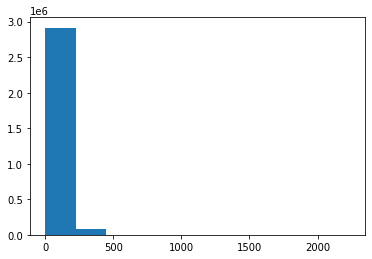

In [98]:
engine_power = df['engine_power']
plt.hist(engine_power)

(array([8.96284e+05, 1.54703e+05, 5.00760e+04, 2.25940e+04, 7.27500e+03,
        6.14500e+03, 1.28600e+03, 3.33000e+02, 1.07000e+02, 4.20000e+01]),
 array([101. , 160.8, 220.6, 280.4, 340.2, 400. , 459.8, 519.6, 579.4,
        639.2, 699. ]),
 <BarContainer object of 10 artists>)

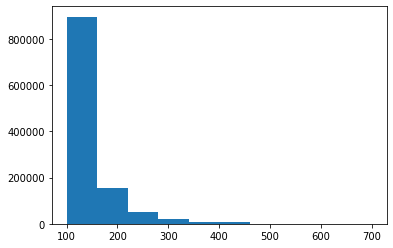

In [100]:
engine_power = df.loc[(df['engine_power'] > 100) & (df['engine_power'] < 700) , 'engine_power']
plt.hist(engine_power)

#### Body type

In [101]:
body_type = df['body_type']
body_type.unique()

array([nan, 'van', 'compact', 'transporter', 'coupe', 'convertible',
       'other', 'sedan', 'stationwagon', 'offroad'], dtype=object)

In [102]:
body_type.value_counts()

other           1964289
compact          241948
coupe             70576
stationwagon      69895
van               31300
offroad           22549
sedan             19669
convertible        5332
transporter        4440
Name: body_type, dtype: int64

### color_slug

In [103]:
color_slug = df['color_slug']
color_slug.unique()

array([nan, 'beige', 'grey', 'blue', 'violet', 'silver', 'black', 'white',
       'red', 'brown', 'bronze', 'yellow', 'orange', 'green', 'gold'],
      dtype=object)

#### transmission

In [104]:
transmission = df['transmission']
transmission.unique()

array(['man', 'auto', nan], dtype=object)

#### fuel_type

In [105]:
fuel_type = df['fuel_type']
fuel_type.unique()

array(['diesel', 'gasoline', nan, 'lpg', 'cng', 'electric'], dtype=object)

#### year

In [107]:
stk_year = df['stk_year']
stk_year.value_counts()[:10]

None      1308651
2018.0     169746
2017.0     142800
2016.0      98793
2019.0      41482
2017        37875
2016        25988
2018        14015
2019         2727
2015          869
Name: stk_year, dtype: int64

In [114]:
man_year = df['manufacture_year']
man_year.value_counts().head(20)

2015.0    441383
2012.0    246152
2011.0    219843
2014.0    201342
2013.0    165305
2007.0    158319
2010.0    157244
2008.0    155255
2006.0    154670
2009.0    145305
2005.0    143435
2004.0    128594
2016.0    123695
2003.0    116947
2002.0    105510
2001.0     98724
2000.0     91530
1999.0     75095
1998.0     55658
1997.0     37943
Name: manufacture_year, dtype: int64

#### Price

In [115]:
price = df['price_eur']
price.value_counts()

1295.34     673623
9900.00       6609
10900.00      6497
12900.00      6274
11900.00      6169
             ...  
8140.90          1
15320.69         1
64696.19         1
56355.26         1
7392.82          1
Name: price_eur, Length: 227305, dtype: int64

<Axes: xlabel='price_eur', ylabel='Count'>

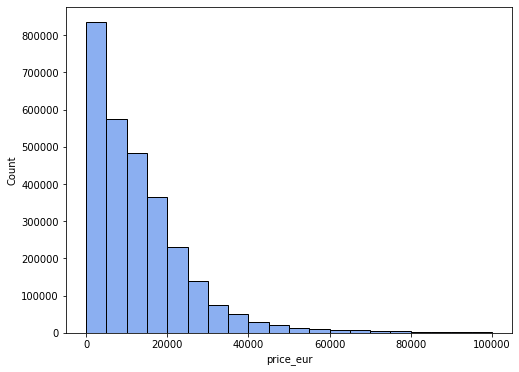

In [121]:
price = price[(price < 100000) & (price != 1295.34)]
plt.figure(figsize=(8,6))
sns.histplot(price, color='cornflowerblue', bins=20)

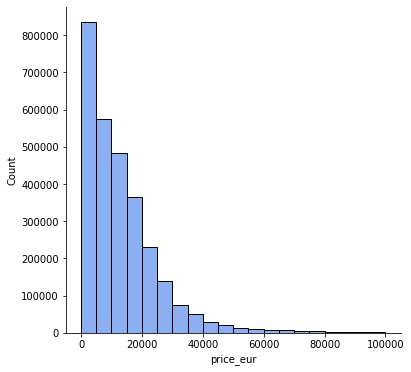

In [129]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot horizontal bars
bars = sns.histplot(price, color='cornflowerblue', bins=20)


# Remove spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()

#### Clean df

In [2]:
clean_df = pd.read_csv(r"../../data/clean_df.csv")
clean_df.head()

C:\Users\nhduc\AppData\Local\Temp\ipykernel_16820\3428702827.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_df = pd.read_csv(r"../../data/clean_df.csv")


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,138.12506,compact,NaN,man,5.0,7.0,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,108.62262,compact,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,113.98670,compact,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,84.48426,compact,NaN,man,5.0,5.0,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,84.48426,compact,NaN,man,5.0,5.0,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [4]:
clean_df['date_created'] = pd.to_datetime(clean_df['date_created'])
clean_df['year_created'] = clean_df['date_created'].dt.year

clean_df['man_period'] = clean_df['year_created'] - clean_df['manufacture_year']
clean_df['stk_period'] = clean_df['year_created'] - clean_df['stk_year']

clean_df = clean_df.drop(['manufacture_year', 'stk_year', 'date_created', 'date_last_seen', 'year_created'], axis=1)
clean_df.head()

,maker,model,mileage,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,man_period,stk_period
0,ford,galaxy,151000.0,2000.0,138.12506,compact,man,5.0,7.0,diesel,10584.75,4.0,NaN
1,skoda,octavia,143476.0,2000.0,108.62262,compact,man,5.0,5.0,diesel,8882.31,3.0,NaN
2,bmw,NaN,97676.0,1995.0,113.98670,compact,man,5.0,5.0,diesel,12065.06,5.0,NaN
3,skoda,fabia,111970.0,1200.0,84.48426,compact,man,5.0,5.0,gasoline,2960.77,11.0,NaN
4,skoda,fabia,128886.0,1200.0,84.48426,compact,man,5.0,5.0,gasoline,2738.71,11.0,NaN


In [9]:
corr_df = clean_df[["mileage"	,"engine_displacement"	,"engine_power"	,"door_count"	,"seat_count",		"man_period",	"stk_period", "price_eur"]]
corr = corr_df.corr().abs()
corr

,mileage,engine_displacement,engine_power,door_count,seat_count,man_period,stk_period,price_eur
mileage,1.000000,0.216322,0.000369,0.024099,0.052112,0.694517,0.486847,0.505467
engine_displacement,0.216322,1.000000,0.780909,0.022409,0.042308,0.131164,0.071904,0.392190
engine_power,0.000369,0.780909,1.000000,0.045531,0.011943,0.071951,0.064030,0.613308
door_count,0.024099,0.022409,0.045531,1.000000,0.395099,0.137039,0.000888,0.039982
seat_count,0.052112,0.042308,0.011943,0.395099,1.000000,0.033851,0.017060,0.022842
man_period,0.694517,0.131164,0.071951,0.137039,0.033851,1.000000,0.391681,0.540648
stk_period,0.486847,0.071904,0.064030,0.000888,0.017060,0.391681,1.000000,0.361007
price_eur,0.505467,0.392190,0.613308,0.039982,0.022842,0.540648,0.361007,1.000000


<Axes: >

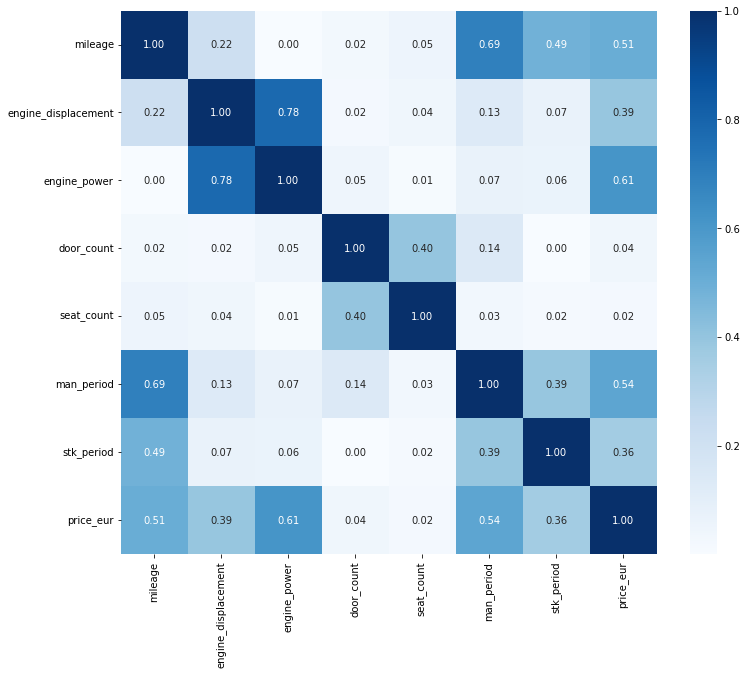

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')